 # Deliverable 2:
  Scrape and Analyze Mars Weather Data (60 points)

In [28]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
mars_soup = soup(html, 'html.parser')


### Option 1 : extract data using Pandas

In [29]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [30]:
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [33]:
# Creating dataframe from extracted list
mars_df = df[0]
mars_df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [49]:
mars_df.info()

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [38]:
# Typecast 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


1. How many months exist on Mars?

R/ There are 12 different months on Mars according to the data.


In [45]:
# Count of unique values per each df column
mars_df.nunique()

id                  1867
terrestrial_date    1867
sol                 1867
ls                   360
month                 12
min_temp              29
pressure             199
dtype: int64

2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

R/ The dataset contains 1967 sols (Martian days) woth of information.

In [48]:
# Knowing that the column 'sol' indicates the number of elapsed 
# Martian days since the Curiosity landed on Mars we can calculate:

sol_min = mars_df.min()['sol']
sol_max = mars_df.max()['sol']
delta_sol = sol_max - sol_min
print(delta_sol)

1967


3.1 What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. 

R/ Month 3 is the coldest with a average minimal temperature of -83.30729166666667 degrees Celsius, on the other hand, month 8 is the warmest with -68.38297872340425 degrees Celsius.

3.2 Plot the results as a bar chart.

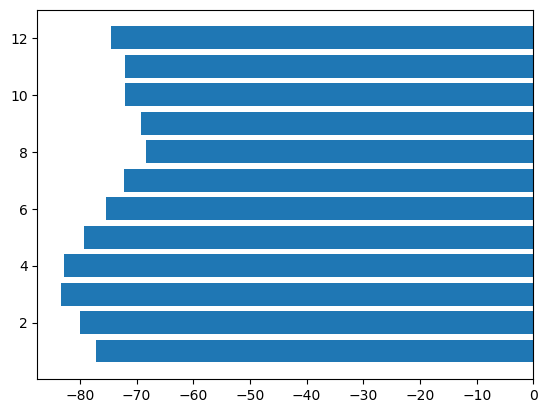

In [95]:
bar = plt.barh(x,y)

In [53]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. 
min_temp_vs_month = mars_df.groupby(['month']).mean()['min_temp']

In [75]:
min_temp_vs_month.info()

<class 'pandas.core.series.Series'>
Int64Index: 12 entries, 1 to 12
Series name: min_temp
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [63]:
print(min_temp_vs_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [102]:
coldest = min_temp_vs_month.min()
warmest = min_temp_vs_month.max()
print(coldest, warmest)


-83.30729166666667 -68.38297872340425


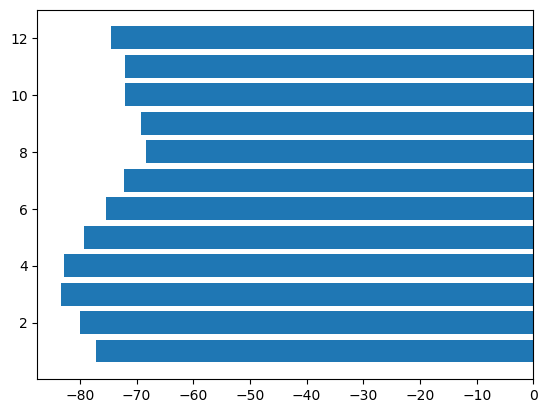

In [92]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = min_temp_vs_month
bar = plt.barh(x,y)


4.1 Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. 

R/ Month 6 has the lowest average athmospheric pressure with 745.054422 and month 9 has the highest average athmospheric pressure with 913.3059701492538

4.2 Plot the results as a bar chart.

In [107]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
atm_vs_month = mars_df.groupby(['month']).mean()['pressure']
atm_vs_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [109]:
low_atm = atm_vs_month.min()
high_atm = atm_vs_month.max()
print(low_atm, high_atm)

745.0544217687075 913.3059701492538


In [ ]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.

Export the DataFrame to a CSV file

In [110]:
# Export the DataFrame to a CSV file
mars_df.to_csv('mars.csv')

### Option 2 : extract data using Beautiful Soup